## **Data Mining Project - Deliverable 1**

Student ID 1: 20250422

Student ID 2: 20250388

Student ID 3: 

we can put this in here or in the end of the notebook

This project focus on an Exploratory Data Analysis, following the CRISP-DM Methodology

## Business Understanding

Goal: Segment customers of Amazing International Airlines Inc. to identify behaviorally and economically distinct groups.
Business questions:
 - Who are the high-value frequent travelers?
 - Which groups are at risk of churn?
 - How can we personalize marketing based on income, loyalty, or travel habits?

Success criteria:
 - Segments are interpretable (demographic, behavioral, value-based)
 - Each segment supports specific business actions (targeted offers, retention strategy)

For this we have two available datasets: 

- DM_AIAI_CustomerDB.csv : with information regarding the costumers on the loyalty program

- DM_AIAI_FlightsDB.csv : with information regarding the costumers' flying activity with AIAI Airlines

## Data Understanding

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from math import ceil

In [3]:
# Read the and import the files
customerDB = pd.read_csv('DM_AIAI_CustomerDB.csv')
flightsDB = pd.read_csv('DM_AIAI_FlightsDB.csv')
metadata = pd.read_csv('DM_AIAI_Metadata.csv', sep=';') # This file is not comma separated but semicolon separated

In [4]:
display(metadata)

,CustomerDB,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Variable,Description,NaN
1,NaN,Loyalty#,Unique customer identifier for loyalty program...,NaN
2,NaN,First Name,Customer's first name,NaN
3,NaN,Last Name,Customer's last name,NaN
4,NaN,Customer Name,Customer's full name (concatenated),NaN
5,NaN,Country,Customer's country of residence,NaN
6,NaN,Province or State,Customer's province or state,NaN
7,NaN,City,Customer's city of residence,NaN
8,NaN,Latitude,Geographic latitude coordinate of customer loc...,NaN
9,NaN,Longitude,Geographic longitude coordinate of customer lo...,NaN


Loyalty is the costumer identifier so it should be the index for our datasets.

### **Analyzing CustomerDB**

In [5]:
customerDB.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [6]:
customerDB.columns

Index(['Unnamed: 0', 'Loyalty#', 'First Name', 'Last Name', 'Customer Name',
       'Country', 'Province or State', 'City', 'Latitude', 'Longitude',
       'Postal code', 'Gender', 'Education', 'Location Code', 'Income',
       'Marital Status', 'LoyaltyStatus', 'EnrollmentDateOpening',
       'CancellationDate', 'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

In [7]:
customerDB.shape

(16921, 21)

In [8]:
customerDB.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,8440.023639,4884.775439,0.000000,4210.000000,8440.000000,12670.000000,16900.000000
Loyalty#,16921.0,550197.393771,259251.503597,100011.000000,326823.000000,550896.000000,772438.000000,999999.000000
Latitude,16921.0,47.174500,3.307971,42.984924,44.231171,46.087818,49.282730,60.721188
Longitude,16921.0,-91.814768,22.242429,-135.056840,-120.237660,-79.383186,-74.596184,-52.712578
Income,16901.0,37758.038400,30368.992499,0.000000,0.000000,34161.000000,62396.000000,99981.000000
Customer Lifetime Value,16901.0,7990.460188,6863.173093,1898.010000,3979.720000,5780.180000,8945.690000,83325.380000


In 'Income' column we can see that at least 25% of customers in the Loyaty Program have Income equal to 0. We can analyze if they are either unemployed or students further on.

In [9]:
customerDB.describe(include=['object']).T

,count,unique,top,freq
First Name,16921,4941,Stacey,13
Last Name,16921,15404,Ypina,4
Customer Name,16921,16921,Emma Martin,1
Country,16921,1,Canada,16921
Province or State,16921,11,Ontario,5468
City,16921,29,Toronto,3390
Postal code,16921,75,V6E 3D9,917
Gender,16921,2,female,8497
Education,16921,5,Bachelor,10586
Location Code,16921,3,Suburban,5716


Observations:

- Female/Masculine customers are well distributed.

- A big percentage of customers have a Bachelor degree.

- More than half of the customers are married.

- Almost half of customers are in the LoyaltyStatus 'Star'. Are the remaining associated with very high income? can we create a group by this?

In [10]:
customerDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

The data types seem to be correct, let's examine the null values:

In [11]:
customerDB.isnull().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

**CancellationDate column:**

- Missingness: Not random

- Reason: Customer never cancelled : meaningful

- Treatment: No imputation needed


**Customer Lifetime Value column:**

- Missingness: Not random

- Reason: seems to be new customers with no history

- Treatment: Could impute with mean/median or predictive model or drop rows


**Income column:**

- Missingness: Random

- Reason: Customer did not provide or data not collected

- Treatment: Can impute with median or regression model or drop rows

In [12]:
income_null = customerDB[customerDB['Income'].isnull()]
income_null.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,0,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,...,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard


In [13]:
lifetime_value_null = customerDB[customerDB['Customer Lifetime Value'].isnull()]
lifetime_value_null.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,0,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,...,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard


In [14]:
#confirm that the rows with null-values for this columns are the same ones
# df1.equals(df2) returns True if the Data Frames have the same indexes, columns and values
income_null.equals(lifetime_value_null)

True

We noticed that, the missing values from 'Income' and 'Customer Lifetime Value' are the same. By analyzing the rest of the data, we can see that the 'EnrollmentDateOpening' and 'CancellationDate' are the same which means that this 20 customers have gotten into the program on the same day they cancelled the program and also entered by the Standard mode.

For a double-check before deciding to drop the rows, we will check if these Loyaty#'s have any activity in the FlightsDB.

If they do not have any information in FlightsDB, since they didn't spend even a day in the program and have restricted information, we are are going to drop these rows in Data Preparation.

**Check for duplicates**

In [15]:
# Check for total duplicated rows
customerDB.duplicated().sum()

np.int64(0)

There are no total duplicates

In [16]:
# Check for duplicates in 'Unnamed: 0'
customerDB.duplicated(subset='Unnamed: 0').sum()

np.int64(20)

In [17]:
unnamed_duplicates = customerDB[customerDB.duplicated(subset='Unnamed: 0')]
unnamed_duplicates

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,0,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,...,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
16906,5,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,...,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
16907,6,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,...,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
16908,7,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,...,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
16909,8,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,...,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard
16910,9,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,...,female,Bachelor,Suburban,NaN,Single,Star,9/14/2018,9/14/2018,NaN,Standard


We have 16921 observations in the costumers data set. It seems that after row 16900, the index/'Unnamed: 0' started again at 0. There are duplicates but if we look closer, they are the same exact rows as the ones with the null-values in 'Income' and 'Customer Lifetime Value':

In [18]:
#confirm that the duplicated rows for 'Unnamed: 0' are the same ones as for 'Customer Lifetime Value',
#and also for 'Income' since they are the same as checked before
unnamed_duplicates.equals(lifetime_value_null)

True

Check if these Loyaty#'s have activity in the FlightsDB:

In [19]:
customers_incorrect_index = unnamed_duplicates.index
customers_incorrect_loyalty = unnamed_duplicates['Loyalty#']
customers_incorrect_loyalty

16901    999987
16902    999988
16903    999989
16904    999990
16905    999991
16906    999992
16907    999993
16908    999994
16909    999995
16910    999996
16911    999997
16912    999998
16913    999999
16914    100017
16915    100011
16916    100012
16917    100013
16918    100014
16919    100015
16920    100016
Name: Loyalty#, dtype: int64

In [20]:
flightsDB[flightsDB['Loyalty#'].isin(customers_incorrect_loyalty)]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed


Since there are no rows, these customers have no activity with this company. With all this analysis we decided to drop the these rows because they don't give us any relevant information for clustering.

In [21]:
customerDB.drop(customers_incorrect_index, inplace=True)
customerDB.tail()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16896,16896,823768,Mandy,Sammarco,Mandy Sammarco,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,female,College,Rural,0.0,Married,Star,12/22/2015,NaN,61850.19,Standard
16897,16897,680886,Jamee,Ahlm,Jamee Ahlm,Canada,Saskatchewan,Regina,50.445210,-104.618900,...,female,Bachelor,Rural,78310.0,Married,Star,9/6/2017,NaN,67907.27,Standard
16898,16898,776187,Janina,Lumb,Janina Lumb,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,3/24/2017,NaN,74228.52,Standard
16899,16899,615459,Dannie,Paplow,Dannie Paplow,Canada,Quebec,Montreal,45.501690,-73.567253,...,male,Bachelor,Urban,58958.0,Married,Star,4/22/2021,12/22/2021,83325.38,2021 Promotion
16900,16900,652627,Ariane,Peyton,Ariane Peyton,Canada,Manitoba,Winnipeg,49.895138,-97.138374,...,female,Bachelor,Suburban,58958.0,Married,Star,12/3/2018,8/3/2019,83325.38,Standard


In [22]:
customerDB.duplicated(subset='Loyalty#').sum()

np.int64(164)

In [23]:
duplicated_customers = customerDB[customerDB.duplicated(subset='Loyalty#', keep = False)]
duplicated_customers

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
5,5,193662,Leatrice,Hanlin,Leatrice Hanlin,Canada,Yukon,Whitehorse,60.721188,-135.056840,...,male,Bachelor,Rural,26262.0,Married,Star,5/7/2015,NaN,3844.57,Standard
123,123,746226,Theodora,Sampieri,Theodora Sampieri,Canada,British Columbia,Whistler,50.116322,-122.957360,...,female,Bachelor,Urban,43177.0,Married,Star,1/17/2021,NaN,4089.04,Standard
141,141,279419,Reyes,Sobczak,Reyes Sobczak,Canada,British Columbia,West Vancouver,49.328625,-123.160190,...,female,College,Urban,0.0,Single,Star,7/3/2016,NaN,4117.37,Standard
161,161,354438,Maricela,Veals,Maricela Veals,Canada,Quebec,Montreal,45.501690,-73.567253,...,male,College,Rural,0.0,Married,Star,9/1/2021,NaN,4167.09,Standard
204,204,719633,Elnora,Holzmiller,Elnora Holzmiller,Canada,British Columbia,Victoria,48.428421,-123.365650,...,male,Bachelor,Suburban,27608.0,Divorced,Star,12/3/2019,NaN,4250.78,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16488,16488,373638,Sherryl,Vanduyn,Sherryl Vanduyn,Canada,Quebec,Tremblant,46.118462,-74.596184,...,female,College,Rural,0.0,Single,Star,7/30/2021,NaN,18898.33,Standard
16625,16625,727507,Marnie,Kisner,Marnie Kisner,Canada,Alberta,Banff,51.178398,-115.570800,...,male,Bachelor,Suburban,93011.0,Divorced,Star,12/26/2020,NaN,22643.83,Standard
16766,16766,278854,Marylee,Villicana,Marylee Villicana,Canada,Quebec,Tremblant,46.118462,-74.596184,...,female,High School or Below,Urban,20799.0,Single,Star,8/16/2017,NaN,28328.47,Standard
16775,16775,434807,Cira,Nalley,Cira Nalley,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,Bachelor,Rural,35296.0,Single,Star,8/27/2015,NaN,29194.37,Standard


In [24]:
customerDB[customerDB['Loyalty#'] == 368073]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
5003,5003,368073,Rufus,Dannenberg,Rufus Dannenberg,Canada,Quebec,Montreal,45.501690,-73.567253,...,female,Doctor,Suburban,19447.0,Married,Nova,3/27/2020,NaN,3336.22,Standard
16881,16881,368073,Enedina,Dickason,Enedina Dickason,Canada,Quebec,Quebec City,46.813877,-71.207977,...,male,Bachelor,Urban,66661.0,Single,Star,3/20/2018,NaN,42561.63,Standard


With this information we can see that, there are 164 duplicates and they don't belong neither to the same customer neither do they belong to related people (different Last Names and different cities).


In [25]:
len(duplicated_customers) / len(customerDB) * 100

1.9347967575883085

The number of duplicates in the customer Loyalty number is only 1.9 %. After analysing the flights data set we will decide if we can identidy and separate the costumers or if we should drop them.

### **Analyzing FlightsDB**

In [26]:
flightsDB.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [27]:
flightsDB.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')

In [28]:
flightsDB.shape

(608436, 10)

**Duplicated Loyalty# Solution**

In [29]:
flightsDB[flightsDB['Loyalty#'].isin(duplicated_customers['Loyalty#'])]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
27,279419,2021,12,12/1/2021,12.0,0.0,11849.0,1184.00,0.0,0.0
171,990512,2021,12,12/1/2021,5.0,2.0,31991.0,3199.00,0.0,0.0
248,322169,2021,12,12/1/2021,2.0,0.0,17125.0,1712.00,0.0,0.0
297,106001,2021,12,12/1/2021,7.0,0.0,26469.0,2646.00,0.0,0.0
450,727091,2021,12,12/1/2021,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
608249,989528,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608263,990512,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608264,990512,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608298,992168,2019,12,12/1/2019,11.7,4.5,2987.1,298.71,0.0,0.0


In [30]:
flightsDB[flightsDB['Loyalty#'] == 279419] # the loyalty number of the first row of the above output

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
27,279419,2021,12,12/1/2021,12.0,0.0,11849.0,1184.00,0.0,0.0
6655,279419,2020,6,6/1/2020,0.0,0.0,0.0,0.00,0.0,0.0
16082,279419,2020,5,5/1/2020,3.0,3.0,12848.0,1284.00,0.0,0.0
29682,279419,2020,5,5/1/2020,0.0,0.0,0.0,0.00,0.0,0.0
30324,279419,2020,4,4/1/2020,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
561096,279419,2019,10,10/1/2019,5.4,5.4,15857.1,1585.71,3365.1,33.3
577996,279419,2019,11,11/1/2019,2.7,0.0,15080.4,1508.04,0.0,0.0
577997,279419,2019,11,11/1/2019,9.9,0.0,23248.8,2324.88,0.0,0.0
594897,279419,2019,12,12/1/2019,0.9,0.0,7848.0,784.80,0.0,0.0


In the last 2 rows we have information about the same date so we can see that the loyalties are still repeated in this data set. We could probably associate the total points accumulated by costumer with the Customer Lifetime Value in the costumers data set, however, we can not differenciate the the duplicates in the flights data set so we dont know how to calculate the total of the Points Accumulated for the duplicates. For this reason, and because they represent a small percentage of the customers, we will drop the correspoding loyalty numbers 

In [31]:
customerDB.drop(duplicated_customers.index, inplace=True)
customerDB

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16896,16896,823768,Mandy,Sammarco,Mandy Sammarco,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,female,College,Rural,0.0,Married,Star,12/22/2015,NaN,61850.19,Standard
16897,16897,680886,Jamee,Ahlm,Jamee Ahlm,Canada,Saskatchewan,Regina,50.445210,-104.618900,...,female,Bachelor,Rural,78310.0,Married,Star,9/6/2017,NaN,67907.27,Standard
16898,16898,776187,Janina,Lumb,Janina Lumb,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,3/24/2017,NaN,74228.52,Standard
16899,16899,615459,Dannie,Paplow,Dannie Paplow,Canada,Quebec,Montreal,45.501690,-73.567253,...,male,Bachelor,Urban,58958.0,Married,Star,4/22/2021,12/22/2021,83325.38,2021 Promotion


In [32]:
customerDB.duplicated().sum()
# check if the duplicates were removed correctly

np.int64(0)

In [33]:
# remove the customers duplicates in the flights data set
flightsDB.drop(flightsDB[flightsDB['Loyalty#'].isin(duplicated_customers['Loyalty#'])].index, inplace = True)
flightsDB


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.00,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.00,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.00,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.00,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
608431,999902,2019,12,12/1/2019,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,12/1/2019,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0


In [34]:
flightsDB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596664 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  596664 non-null  int64  
 1   Year                      596664 non-null  int64  
 2   Month                     596664 non-null  int64  
 3   YearMonthDate             596664 non-null  object 
 4   NumFlights                596664 non-null  float64
 5   NumFlightsWithCompanions  596664 non-null  float64
 6   DistanceKM                596664 non-null  float64
 7   PointsAccumulated         596664 non-null  float64
 8   PointsRedeemed            596664 non-null  float64
 9   DollarCostPointsRedeemed  596664 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 50.1+ MB


We have 3 variables dedicated to the time, this is tripling its significance, we will probably just use the 'YearMonthDate' but we have to change it to datetim type. Check if there is a relationship between the Distance and the Points acummulated, or the number of flights. The points redeemed and the Cost of the points redeemed is probably redundant. 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed', 'DistanceKM', 'NumFlights' and 'NumFlightsWithCompanions' are floats. Lets see if they are correct.

In [35]:
# if the features related to points or distance have more than 2 decimals, then it would be odd
points_related_features = ['PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed', 'DistanceKM']
for feat in points_related_features:
     odd_values = flightsDB[feat].apply(lambda x: len(str(x).split('.')[1]) > 2).sum()
     print(f'{feat} odd values : {odd_values}')

PointsAccumulated odd values : 0
PointsRedeemed odd values : 0
DollarCostPointsRedeemed odd values : 0
DistanceKM odd values : 0


The floats in these columns only have 2 decimals, which is normal. However 'NumFlights' and 'NumFlightsWithCompanions' are also floats when they should be integers.

**Analyze the problem with NumFlights as floats:**

In [36]:
flightsDB['NumFlights'].value_counts()

NumFlights
0.0     297319
9.0      20045
3.0      17914
11.0     15452
5.0      14834
7.0      14352
8.0      14134
6.0      13646
2.0      13418
10.0     13162
4.0      12616
1.0      12476
13.0     10638
12.0     10233
9.9       7428
14.0      6954
2.7       6809
6.3       6683
7.2       6638
5.4       6584
15.0      6499
8.1       6427
3.6       6414
4.5       6266
1.8       6220
0.9       5752
10.8      5327
11.7      5097
16.0      4294
17.0      3834
18.0      3454
13.5      3235
12.6      3198
14.4      2140
15.3      1781
19.0      1473
16.2      1343
20.0      1140
17.1       688
21.0       519
18.9       228
Name: count, dtype: int64

In [37]:
flightsDB['NumFlights'].nunique()

41

In [38]:
flights_related_features = ['NumFlights', 'NumFlightsWithCompanions']
for feat in flights_related_features:
     not_int = flightsDB[feat].apply(lambda x: x % 1 != 0).sum()
     print(f'{feat} nr of floats : {not_int}')

NumFlights nr of floats : 88258
NumFlightsWithCompanions nr of floats : 50090


The number of floats in these features is very high, lets check the percentage

In [39]:
len( flightsDB[ (flightsDB['NumFlights'] % 1 != 0) | (flightsDB['NumFlightsWithCompanions'] % 1 != 0)]) / len(flightsDB) * 100

15.371800544359976

15 % of the data in flightsDB has floats either in 'NumFlights' or 'NumFlightsWithCompanions'. This value is ver large so we can not remove these observations since we would be losing too much information. The best aproach to this would be to round all of them down. Being a float should not affect the visualizations so we will only do this step in Data Preparation.

In [40]:
flightsDB.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,596664.0,549435.680825,258867.195581,100018.0,326234.00,550020.0,771901.00,999986.0
Year,596664.0,2020.000000,0.816497,2019.0,2019.00,2020.0,2021.00,2021.0
Month,596664.0,6.500000,3.452055,1.0,3.75,6.5,9.25,12.0
NumFlights,596664.0,3.926646,5.063236,0.0,0.00,0.9,7.20,21.0
NumFlightsWithCompanions,596664.0,0.988214,2.006975,0.0,0.00,0.0,1.00,11.0
DistanceKM,596664.0,7973.603444,10269.174348,0.0,0.00,984.5,15400.00,42040.0
PointsAccumulated,596664.0,797.203290,1026.793920,0.0,0.00,98.0,1540.00,4204.0
PointsRedeemed,596664.0,236.469767,985.680370,0.0,0.00,0.0,0.00,7496.0
DollarCostPointsRedeemed,596664.0,2.336869,9.749377,0.0,0.00,0.0,0.00,74.0


21 flights in a single month seems almost impossible. Could it be an error? There is a huge difference between the 75% percentile and the maximum value in NumFlightsWithCompanions, could this be a niche group in the data set that travels a lot with companions and could have similar characterists in the costumers data set.

In [41]:
flightsDB[flightsDB['NumFlights'] > 20]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
199208,278815,2021,7,7/1/2021,21.0,0.0,34356.0,3435.0,0.0,0.0
199233,677527,2021,7,7/1/2021,21.0,11.0,4987.0,498.0,0.0,0.0
199256,375265,2021,7,7/1/2021,21.0,4.0,18624.0,1862.0,0.0,0.0
199392,923959,2021,7,7/1/2021,21.0,9.0,31183.0,3118.0,6066.0,60.0
199490,966391,2021,7,7/1/2021,21.0,9.0,37452.0,3745.0,5728.0,57.0
...,...,...,...,...,...,...,...,...,...,...
394134,488853,2020,7,7/1/2020,21.0,0.0,35631.0,3563.0,0.0,0.0
394196,113877,2020,7,7/1/2020,21.0,7.0,32961.0,3296.0,0.0,0.0
394269,155964,2020,7,7/1/2020,21.0,0.0,22935.0,2293.0,0.0,0.0
394323,675516,2020,7,7/1/2020,21.0,5.0,31675.0,3167.0,7045.0,70.0


A lot of costumers have a very high number of flights per month. These people could have similar characteristics so it should be interesting to analyse the relationship between this variable and the ones in the costumers data set

In [42]:
flightsDB.describe(include='object').T

,count,unique,top,freq
YearMonthDate,596664,36,12/1/2021,16574


In [43]:
((flightsDB['YearMonthDate'].value_counts()) != 16901).sum()

np.int64(36)

All the costumers have 36 rows in the flights data set, one for each month of the period 2019-2021. So each date appears 16901 times

In [44]:
flightsDB['YearMonthDate'].unique()

array(['12/1/2021', '6/1/2020', '5/1/2020', '4/1/2020', '3/1/2020',
       '2/1/2020', '1/1/2020', '11/1/2021', '10/1/2021', '6/1/2021',
       '9/1/2021', '5/1/2021', '4/1/2021', '8/1/2021', '7/1/2021',
       '3/1/2021', '2/1/2021', '1/1/2021', '12/1/2020', '11/1/2020',
       '10/1/2020', '9/1/2020', '8/1/2020', '7/1/2020', '1/1/2019',
       '2/1/2019', '3/1/2019', '4/1/2019', '5/1/2019', '6/1/2019',
       '7/1/2019', '8/1/2019', '9/1/2019', '10/1/2019', '11/1/2019',
       '12/1/2019'], dtype=object)

All the values in this column refer to the first day of the month so the values could be switched in order to refer only the month and year. We will transform this column in a datetime column so we can plot information throughout time and only keep the month and year since the day is always the first of the month.

In [45]:
flightsDB['MonthYear'] = pd.to_datetime(
    flightsDB['YearMonthDate'], format='%m/%d/%Y'
).dt.strftime('%Y-%m')
flightsDB

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,MonthYear
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.00,0.0,0.0,2021-12
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.00,0.0,0.0,2021-12
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.00,0.0,0.0,2021-12
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.00,3213.0,32.0,2021-12
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.00,0.0,0.0,2021-12
...,...,...,...,...,...,...,...,...,...,...,...
608431,999902,2019,12,12/1/2019,7.2,0.0,30766.5,3076.65,0.0,0.0,2019-12
608432,999911,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0,2019-12
608433,999940,2019,12,12/1/2019,14.4,0.9,18261.0,1826.10,0.0,0.0,2019-12
608434,999982,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0,2019-12


**Duplicated values:**

In [46]:
flightsDB.duplicated().sum()

np.int64(0)

No duplicates

**Missing Values**

In [47]:
flightsDB.isnull().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
MonthYear                   0
dtype: int64

No missing values

**Inconsistencies:**

While analyzing both the dataset in the code and on Excel, we found out some inconsistencies:

In [48]:
#check if all the flights with companions had the correct information on number of flights
(flightsDB['NumFlights'] < flightsDB['NumFlightsWithCompanions']).sum()


np.int64(0)

The number of flights is always larger than the number of flights with companions, so there isnt a problem here

In [49]:
has_distancekm = flightsDB[flightsDB['DistanceKM'] != 0] #filter by rows with values different than 0 in Distances

In [50]:
detected_errors_distance = has_distancekm[has_distancekm['NumFlights'] == 0] #filter by rows with number of flights equal to 0
detected_errors_distance

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,MonthYear
19,261109,2021,12,12/1/2021,0.0,0.0,13736.0,1373.00,0.0,0.0,2021-12
93,817609,2021,12,12/1/2021,0.0,0.0,23775.0,2377.00,0.0,0.0,2021-12
96,192600,2021,12,12/1/2021,0.0,0.0,5119.0,511.00,0.0,0.0,2021-12
116,883242,2021,12,12/1/2021,0.0,0.0,20681.0,2068.00,0.0,0.0,2021-12
154,493800,2021,12,12/1/2021,0.0,0.0,17502.0,1750.00,0.0,0.0,2021-12
...,...,...,...,...,...,...,...,...,...,...,...
607387,944702,2019,12,12/1/2019,0.0,0.0,29223.0,2922.30,0.0,0.0,2019-12
607549,952629,2019,12,12/1/2019,0.0,0.0,27342.9,2734.29,0.0,0.0,2019-12
607594,954973,2019,12,12/1/2019,0.0,0.0,6436.8,643.68,0.0,0.0,2019-12
607744,962989,2019,12,12/1/2019,0.0,0.0,15922.8,1592.28,0.0,0.0,2019-12


We have observations with 0 flights in the month but with distance different from 0, that doesnt make any sense

In [51]:
len(detected_errors_distance)/len(flightsDB['DistanceKM'])

0.009759261493906117

**Relationship between 'DistanceKM' and 'PointsAccumulated'**

In [52]:
has_distancekm[has_distancekm['PointsAccumulated'] == 0]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,MonthYear


In [53]:
percentage_KM_Points = has_distancekm['DistanceKM']/has_distancekm['PointsAccumulated']
round(percentage_KM_Points).value_counts()

10.0    305168
Name: count, dtype: int64

All rows with Distance in KM have Points Accumulated. With this, we understand that the Points Accumulated are calculated based on the Distance. Specifically, the Accumulated Points are 10% of the Distance in KM. These are redundant.

### **Visualizations**

##### **Customers**

In [66]:
sns.set_theme(
    style="whitegrid",
    rc={
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "grid.color": "white",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black"
    }
)

In [55]:
customers_numerical = ['Income','Customer Lifetime Value']

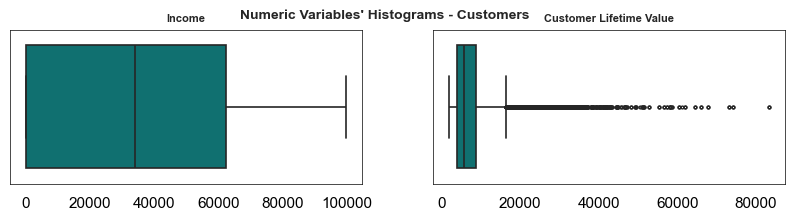

In [ ]:


# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(1, 2, figsize = (10, 2))

for ax, feat in zip(axes.flatten(), customers_numerical):
    sns.boxplot(x=customerDB[feat], ax=ax, color='#008080', fliersize=2, linewidth=1.2)
    ax.set_title(feat, fontsize=8, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Thickness of the border
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms - Customers", fontsize=10, fontweight='bold')

plt.show()

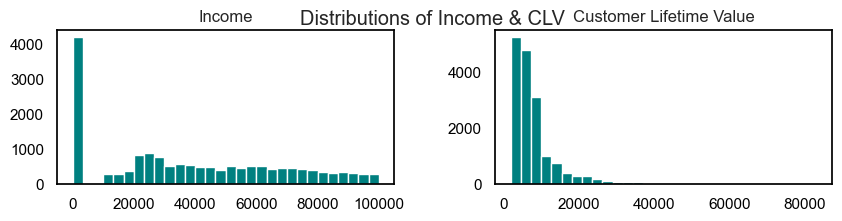

In [75]:
customerDB[customers_numerical].hist(bins=30, figsize=(10,2), color='teal')
plt.suptitle("Distributions of Income & CLV")
plt.show()

We can see that a huge amount of customers doesnt have income, they are probably students. For the Customer Lifetime Value, the plot is very compressed which indicates that we have a lot of very high, extreme values, those are also shown as outliers in the corresponding boxplot

##### **Flights**

In [288]:
flights_numerical = flightsDB.columns.drop(['YearMonthDate', 'MonthYear'])

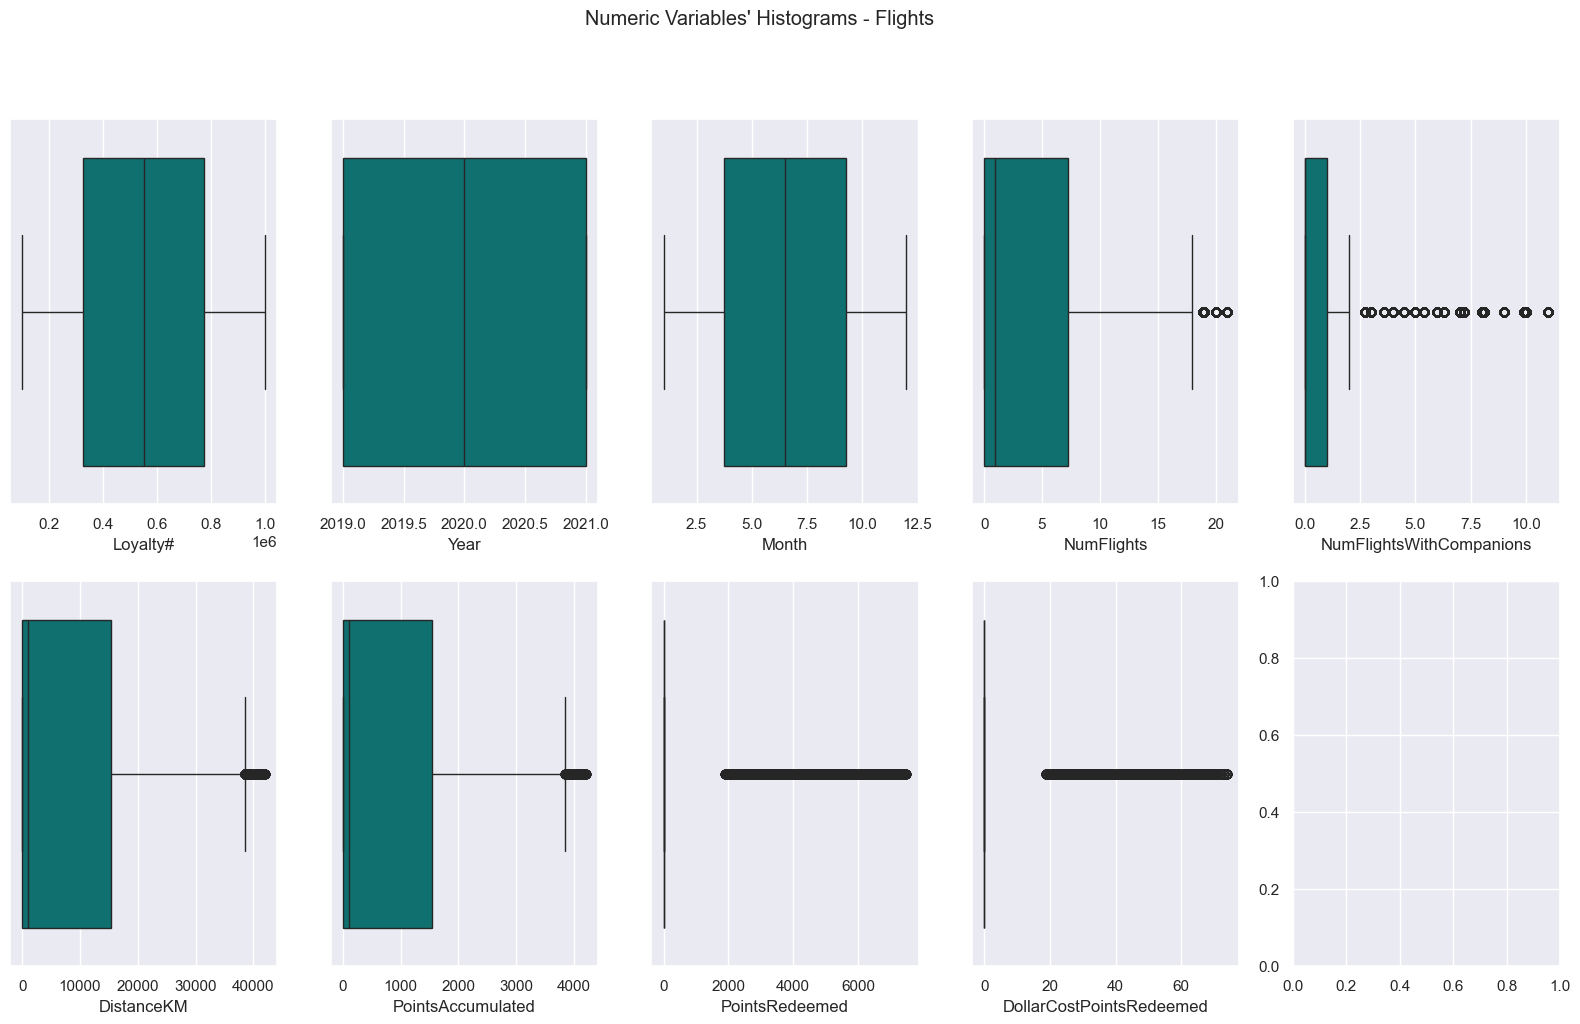

In [ ]:

sns.set()

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(flights_numerical) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), flights_numerical):
    sns.boxplot(x=flightsDB[feat], ax=ax, color='teal')

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Boxplots Flights")

plt.show()

In [ ]:
customers_categorical = customerDB.columns.drop(['Latitude', 'Longitude', 'Income', 'Customer Lifetime Value', 'Country'])

sns.set()

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(customers_categorical) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), customers_categorical):
    sns.countplot(x=customerDB[feat], ax=ax, color='teal')
    ax.set_title(feat)
    ax.tick_params(axis='x', rotation=45)


# Add a centered title to the figure:
plt.suptitle("Categorical Variables' Barcharts - Customers")
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

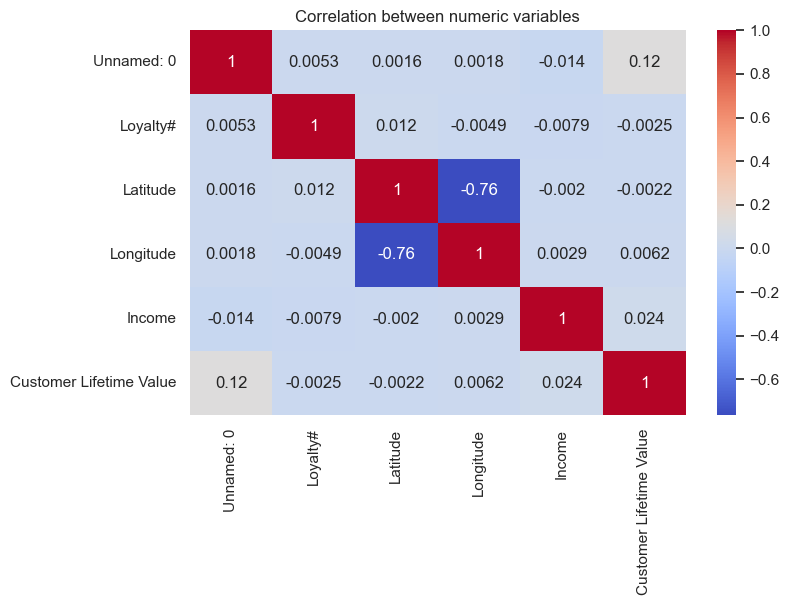

In [112]:
plt.figure(figsize=(8,5))
sns.heatmap(customerDB.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between numeric variables")
plt.show()